<a href="https://colab.research.google.com/github/sharsh09/LGMVIP_DS_August_23/blob/main/LGM_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data.shape

(2035, 8)

In [ ]:
data.size

16280

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data.isnull().sum() #no null values

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

#Data Preprocessing

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Drop unnecessary columns
data = data.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)'], axis=1)

# Check for missing values and handle them if necessary
print(data.isnull().sum())

Date     0
Close    0
dtype: int64


1. The 'Date' column is converted to the datetime format using pd.to_datetime() so that it can be properly sorted and handled.
2. The data is sorted by date using the sort_values() function to ensure it's in chronological order.
3. Unnecessary columns like 'Open', 'High', 'Low', 'Last', 'Total Trade Quantity', and 'Turnover (Lacs)' are dropped using data.drop().
4. The .isnull().sum() method is used to check for missing values in the dataset.

#Data Exploration and Visualization

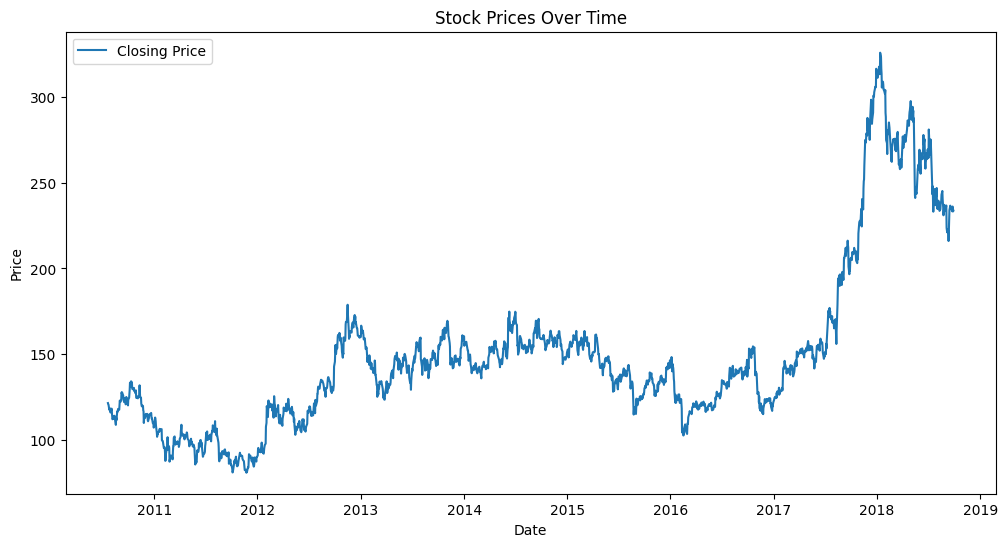

In [ ]:
# Plot the stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

1. The code uses matplotlib.pyplot to create a line plot of the closing stock prices over time.
2. The plt.plot() function is used to plot the 'Date' column on the x-axis and the 'Close' column on the y-axis.
3. Labels, title, and legend are added for clarity.

#Feature Engineering

In [ ]:
# Calculate moving averages as features
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Check the updated data
print(data.head())

           Date   Close  MA_10  MA_50
2034 2010-07-21  121.55    NaN    NaN
2033 2010-07-22  120.90    NaN    NaN
2032 2010-07-23  120.65    NaN    NaN
2031 2010-07-26  117.60    NaN    NaN
2030 2010-07-27  118.65    NaN    NaN


1. Moving averages ('MA_10' and 'MA_50') are calculated as new features using the .rolling().mean() function on the 'Close' column.
2. A moving average smooths out the fluctuations in stock prices, making it easier to identify trends.

#Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values that resulted from the moving averages calculation
data = data.dropna()

# Define input features and target variable
features = ['Close', 'MA_10', 'MA_50']
target = 'Close'

# Split the data into training, validation, and test sets
train_size = 0.7
val_size = 0.15
test_size = 0.15

train_data, test_data = train_test_split(data, train_size=train_size, test_size=test_size, shuffle=False)
val_data, test_data = train_test_split(test_data, train_size=val_size / (val_size + test_size), test_size=test_size / (val_size + test_size), shuffle=False)

# Convert data to sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length][features].values)
        targets.append(data.iloc[i+seq_length][target])
    return sequences, targets

seq_length = 10  # Adjust as needed
train_sequences, train_targets = create_sequences(train_data, seq_length)
val_sequences, val_targets = create_sequences(val_data, seq_length)
test_sequences, test_targets = create_sequences(test_data, seq_length)

# Convert to numpy arrays
train_sequences = np.array(train_sequences)
val_sequences = np.array(val_sequences)
test_sequences = np.array(test_sequences)

train_targets = np.array(train_targets)
val_targets = np.array(val_targets)
test_targets = np.array(test_targets)


1. Rows with missing values resulting from the moving averages calculation are dropped using the .dropna() method.
2. Features and target variable are defined. 'features' is a list of column names used as input features, and 'target' is the column to be predicted.
3. The data is split into training, validation, and test sets using train_test_split(). The data is split chronologically so that the test data comes after the training data.

#Build the Stacked LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17408     
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,977
Trainable params: 32,977
Non-trainable params: 0
_________________________________________________________________


1. A stacked LSTM model is built using the Sequential() model from tensorflow.keras.models.
2. Three LSTM layers are added using model.add(), each with a decreasing number of units (64, 32, and 16). The first two layers have return_sequences=True to pass sequences to subsequent layers.
3. A dense output layer with a single neuron is added to predict the target variable.
4. The model is compiled with 'adam' optimizer and 'mean_squared_error' loss function.

#Training and Validation

In [ ]:
# Train the model
history = model.fit(train_sequences, train_targets, validation_data=(val_sequences, val_targets), epochs=50, batch_size=64)

Epoch 1/50
22/22 [==============================] - 6s 66ms/step - loss: 17534.5352 - val_loss: 17176.3223
Epoch 2/50
22/22 [==============================] - 0s 19ms/step - loss: 16893.0957 - val_loss: 16645.6406
Epoch 3/50
22/22 [==============================] - 0s 23ms/step - loss: 16496.9023 - val_loss: 16357.5938
Epoch 4/50
22/22 [==============================] - 0s 20ms/step - loss: 16289.4971 - val_loss: 16209.5469
Epoch 5/50
22/22 [==============================] - 1s 24ms/step - loss: 16160.3887 - val_loss: 16091.3672
Epoch 6/50
22/22 [==============================] - 1s 26ms/step - loss: 16048.5576 - val_loss: 15980.2178
Epoch 7/50
22/22 [==============================] - 1s 24ms/step - loss: 15924.5322 - val_loss: 15831.8691
Epoch 8/50
22/22 [==============================] - 1s 27ms/step - loss: 15783.7148 - val_loss: 15706.8955
Epoch 9/50
22/22 [==============================] - 0s 17ms/step - loss: 15669.1338 - val_loss: 15596.3184
Epoch 10/50
22/22 [==================

1. The model is trained using the fit() function. Training data (train_sequences and train_targets) are provided along with validation data (val_sequences and val_targets).
2. The epochs parameter determines the number of times the model iterates over the entire training dataset.
3. The batch_size parameter determines the number of samples used in each update of the model's weights.

#Model Evaluation and Forecasting

5/5 [==============================] - 0s 6ms/step - loss: 14976.9678
Test Loss: 14976.9677734375
5/5 [==============================] - 1s 6ms/step


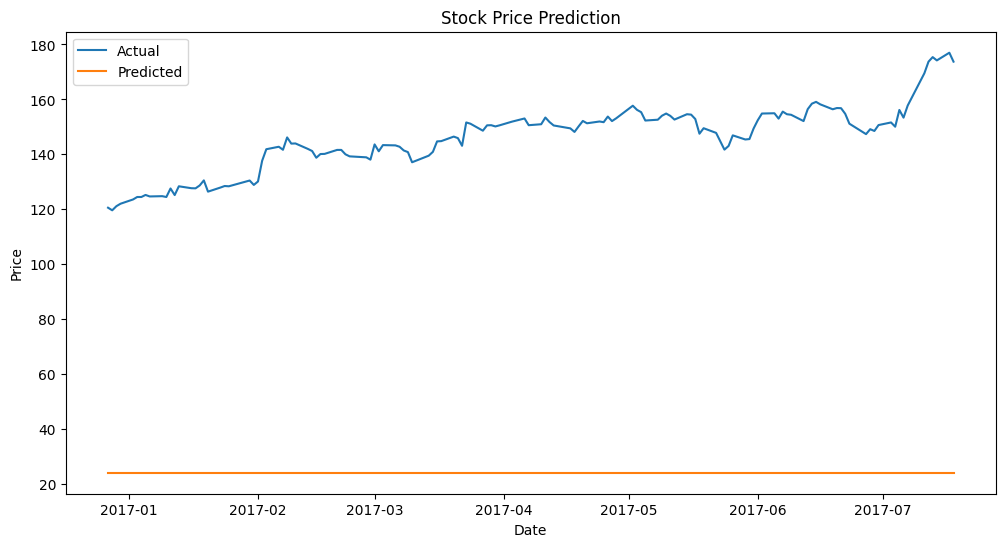

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(test_sequences, test_targets)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(test_sequences)

# Visualize the predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'].iloc[seq_length:], test_targets, label='Actual')
plt.plot(test_data['Date'].iloc[seq_length:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

1. The model is evaluated on the test set using the evaluate() method. The loss value is printed as a measure of the model's performance.
2. Predictions are made on the test sequences using the trained model.
Actual and predicted values are plotted using matplotlib.pyplot to visualize the model's performance.